In [54]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import warnings
import yfinance
warnings.filterwarnings('ignore')
sns.set()
from pmdarima.arima import OCSBTest

In [3]:
raw_data = yfinance.download(tickers= "VOW3.DE, PAH3.DE,BMW.DE" , interval= "1d", group_by='ticker',
                            auto_adjust=True, treads=True)

[*********************100%***********************]  3 of 3 completed


In [4]:
df = raw_data.copy()

In [5]:
df.head()

PAH3.DE                          BMW.DE                      \
              Open High Low Close Volume      Open      High       Low   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN  9.353780  9.353780  9.333748   
1996-11-11     NaN  NaN NaN   NaN    NaN  9.343506  9.348643  9.288031   
1996-11-12     NaN  NaN NaN   NaN    NaN  9.328611  9.414392  9.293168   
1996-11-13     NaN  NaN NaN   NaN    NaN  9.422611  9.422611  9.343508   
1996-11-14     NaN  NaN NaN   NaN    NaN  9.351211  9.394359  9.313714   

                                VOW3.DE                        
               Close     Volume    Open High Low Close Volume  
Date                                                           
1996-11-08  9.333748   767000.0     NaN  NaN NaN   NaN    NaN  
1996-11-11  9.308577   260000.0     NaN  NaN NaN   NaN    NaN  
1996-11-12  9.378950  1066000.0     NaN  NaN NaN   NaN    NaN  
1996-11-13  9.364054   793000.0     NaN  NaN NaN   NaN    NaN  
1996-11-14  9.394359   351000.0     NaN  NaN NaN   NaN    NaN

In [6]:
start_date = '2009-04-05'
ann1 = '2009-12-09'
ann2 = '2012-07-05'
end_date = '2014-01-01'
disel_gate = '2015-09-20'


In [7]:
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

In [8]:
#Returns
df['ret_vol'] = df.vol.pct_change(1)*100
df['ret_por'] = df.por.pct_change(1)*100
df['ret_bmw'] = df.bmw.pct_change(1)*100

In [9]:
# Squared Return
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

In [10]:
# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume


In [11]:
# Freq and filling na

df= df.asfreq('b')

In [12]:
df = df.fillna(method="ffill")

In [13]:
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

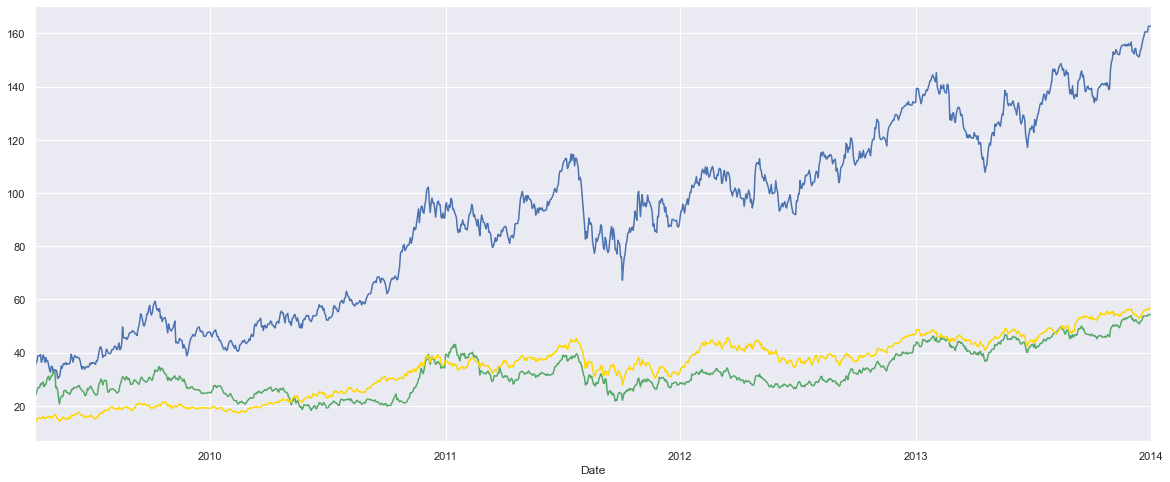

In [16]:
df['vol'][start_date:end_date].plot(figsize=(20,8), c='b')
df['por'][start_date:end_date].plot(figsize=(20,8), c='g')
df['bmw'][start_date:end_date].plot(figsize=(20,8), c='gold')
plt.show()

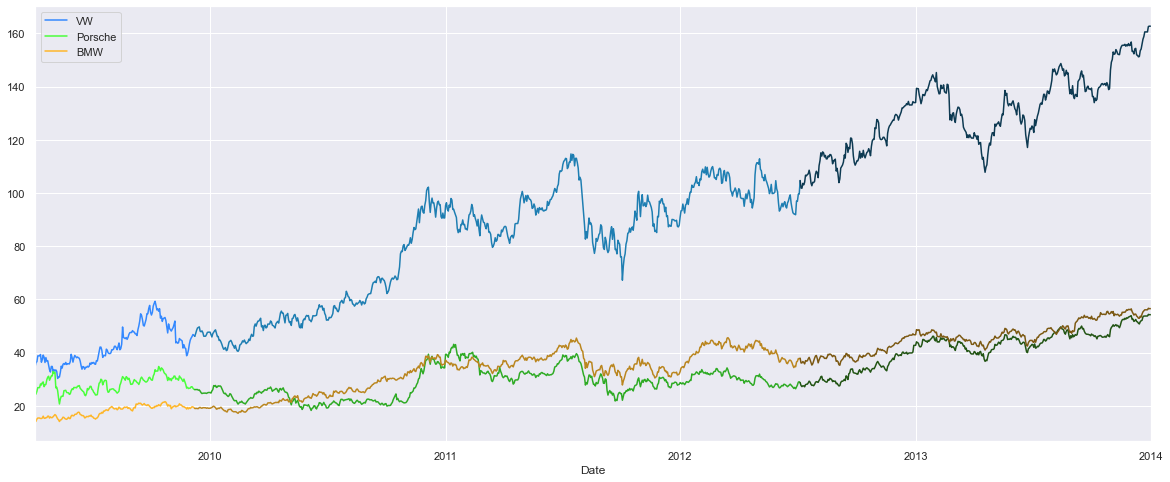

In [17]:
df['vol'][start_date:ann1].plot(figsize=(20,8), c='#3388FF')
df['por'][start_date:ann1].plot(figsize=(20,8), c='#49FF3A')
df['bmw'][start_date:ann1].plot(figsize=(20,8), c='#FEB628')

df['vol'][ann1:ann2].plot(figsize=(20,8), c='#1E7EB2')
df['por'][ann1:ann2].plot(figsize=(20,8), c='#2FAB25')
df['bmw'][ann1:ann2].plot(figsize=(20,8), c='#BA861F')

df['vol'][ann2:end_date].plot(figsize=(20,8), c='#0E3A52')
df['por'][ann2:end_date].plot(figsize=(20,8), c='#225414')
df['bmw'][ann2:end_date].plot(figsize=(20,8), c='#7C5913')

plt.legend(['VW','Porsche', 'BMW'])
plt.show()

## Correlation

In [22]:
print('Corelation among manufactures from' + str(start_date) + 'to' + str(end_date) + '\n')
print('VW and Porsche: \t'+ str(df.vol[start_date:end_date].corr(df.por[start_date:end_date])))
print('VW and BMw: \t\t'+ str(df.vol[start_date:end_date].corr(df.bmw[start_date:end_date])))
print('BMW and Porsche: \t'+ str(df.por[start_date:end_date].corr(df.bmw[start_date:end_date])))

Corelation among manufactures from2009-04-05to2014-01-01

VW and Porsche: 	0.8364634895308144
VW and BMw: 		0.9798969118066215
BMW and Porsche: 	0.8057254152389665


In [27]:
print('Corelation among manufactures from' + str(start_date) + 'to' + str(ann1) + '\n')
print('VW and Porsche: \t'+ str(df.vol[start_date:ann1].corr(df.por[start_date:ann1])))
print('VW and BMW: \t\t'+ str(df.vol[start_date:ann1].corr(df.bmw[start_date:ann1])))
print('BMW and Porsche: \t'+ str(df.por[start_date:ann1].corr(df.bmw[start_date:ann1])))

Corelation among manufactures from2009-04-05to2009-12-09

VW and Porsche: 	0.6762281616315013
VW and BMW: 		0.8441704425425038
BMW and Porsche: 	0.6217076923352637


In [26]:
print('Corelation among manufactures from' + str(ann1) + 'to' + str(ann2) + '\n')
print('VW and Porsche: \t'+ str(df.vol[ann1:ann2].corr(df.por[ann1:ann2])))
print('VW and BMW: \t\t'+ str(df.vol[ann1:ann2].corr(df.bmw[ann1:ann2])))
print('BMW and Porsche: \t'+ str(df.por[ann1:ann2].corr(df.bmw[ann1:ann2])))

Corelation among manufactures from2009-12-09to2012-07-05

VW and Porsche: 	0.7434172979196446
VW and BMW: 		0.9795878006750821
BMW and Porsche: 	0.7051170470171629


In [25]:
print('Corelation among manufactures from' + str(ann2) + 'to' + str(end_date) + '\n')
print('VW and Porsche: \t'+ str(df.vol[ann2:end_date].corr(df.por[ann2:end_date])))
print('VW and BMW: \t\t'+ str(df.vol[ann2:end_date].corr(df.bmw[ann2:end_date])))
print('BMW and Porsche: \t'+ str(df.por[ann2:end_date].corr(df.bmw[ann2:end_date])))

Corelation among manufactures from2012-07-05to2014-01-01

VW and Porsche: 	0.9409608922483721
VW and BMW: 		0.929113119461824
BMW and Porsche: 	0.9497200159215731


In [28]:
print('Corelation among manufactures from' + str(end_date) + 'to' + str(df.index[-1]) + '\n')
print('VW and Porsche: \t'+ str(df.vol[end_date:].corr(df.por[end_date:])))
print('VW and BMw: \t\t'+ str(df.vol[end_date:].corr(df.bmw[end_date:])))
print('BMW and Porsche: \t'+ str(df.por[end_date:].corr(df.bmw[end_date:])))

Corelation among manufactures from2014-01-01to2022-05-18 00:00:00

VW and Porsche: 	0.9049713530707033
VW and BMw: 		0.6973384371588802
BMW and Porsche: 	0.7727233926164138


# Best Fiiting Models

## For VW

In [29]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann1], exogenous=df[['por', 'bmw']][start_date:ann1],
                           m=5, max_p=5, max_q=5)
mod_pr_btw_vol = auto_arima(df.vol[ann1:ann2], exogenous=df[['por', 'bmw']][ann1:ann2],
                           m=5, max_p=5, max_q=5)
mod_pr_post_vol = auto_arima(df.vol[ann2:end_date], exogenous=df[['por', 'bmw']][ann2:end_date],
                           m=5, max_p=5, max_q=5)

In [30]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -313.537
Date:                Thu, 19 May 2022   AIC                            637.073
Time:                        13:10:07   BIC                            652.982
Sample:                    04-06-2009   HQIC                           643.525
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6915      0.424      1.631      0.103      -0.139       1.522
por            0.3927      0.094      4.170      0.000       0.208       0.577
bmw            0.7069      0.335      2.110      0.035       0.050       1.363
ar.L1          0.9630      0.020     48.641      0.000       0.924       1.002
sigma2         1.9548      0.133     14.721      0.000       1.694       2.215
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):               165.78
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
mod_pr_btw_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1040.587
Date:                Thu, 19 May 2022   AIC                           2091.174
Time:                        13:12:23   BIC                           2113.718
Sample:                    12-09-2009   HQIC                          2099.906
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7649      0.060     12.720      0.000       0.647       0.883
bmw            1.6006      0.075     21.285      0.000       1.453       1.748
ar.L1          0.9286      0.032     29.386      0.000       0.867       0.991
ma.L1         -0.9702      0.022    -44.773      0.000      -1.013      -0.928
sigma2         1.3014      0.054     24.263      0.000       1.196       1.406
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):               111.47
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -586.872
Date:                Thu, 19 May 2022   AIC                           1179.744
Time:                        13:13:15   BIC                           1191.635
Sample:                    07-05-2012   HQIC                          1184.458
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.6880      0.055     30.441      0.000       1.579       1.797
bmw            0.8681      0.093      9.291      0.000       0.685       1.051
sigma2         1.1966      0.058     20.496      0.000       1.082       1.311
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               105.52
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.14   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann1], exogenous=df[['vol', 'bmw']][start_date:ann1],
                           m=5, max_p=5, max_q=5)
mod_pr_btw_por = auto_arima(df.por[ann1:ann2], exogenous=df[['vol', 'bmw']][ann1:ann2],
                           m=5, max_p=5, max_q=5)
mod_pr_post_por = auto_arima(df.por[ann2:end_date], exogenous=df[['vol', 'bmw']][ann2:end_date],
                           m=5, max_p=5, max_q=5)

In [34]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  178
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2], 5)   Log Likelihood                -218.843
Date:                                Thu, 19 May 2022   AIC                            451.687
Time:                                        13:20:17   BIC                            473.959
Sample:                                    04-06-2009   HQIC                           460.719
                                         - 12-09-2009                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3410      0.285      1.198      0.231      -0.217       0.899
vol            0.1504      0.053      2.833      0.005       0.046       0.254
bmw            0.8489      0.174      4.870      0.000       0.507       1.191
ar.L1          0.9466      0.028     34.161      0.000       0.892       1.001
ma.S.L5       -0.1051      0.076     -1.375      0.169      -0.255       0.045
ma.S.L10      -0.1864      0.085     -2.198      0.028      -0.353      -0.020
sigma2         0.6758      0.057     11.949      0.000       0.565       0.787
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):               334.99
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
mod_pr_btw_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -557.974
Date:                Thu, 19 May 2022   AIC                           1125.948
Time:                        15:49:31   BIC                           1148.492
Sample:                    12-09-2009   HQIC                          1134.680
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1815      0.016     11.104      0.000       0.149       0.214
bmw            0.3458      0.048      7.222      0.000       0.252       0.440
ar.L1          0.6711      0.216      3.103      0.002       0.247       1.095
ma.L1         -0.6022      0.232     -2.591      0.010      -1.058      -0.147
sigma2         0.3089      0.010     32.427      0.000       0.290       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1076.64
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -195.863
Date:                             Thu, 19 May 2022   AIC                            399.726
Time:                                     13:22:26   BIC                            415.581
Sample:                                 07-05-2012   HQIC                           406.012
                                      - 01-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2262      0.013     16.953      0.000       0.200       0.252
bmw            0.2650      0.043      6.191      0.000       0.181       0.349
ma.S.L5       -0.1426      0.056     -2.529      0.011      -0.253      -0.032
sigma2         0.1602      0.006     28.018      0.000       0.149       0.171
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):               628.02
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction for the Future

### For Porsche

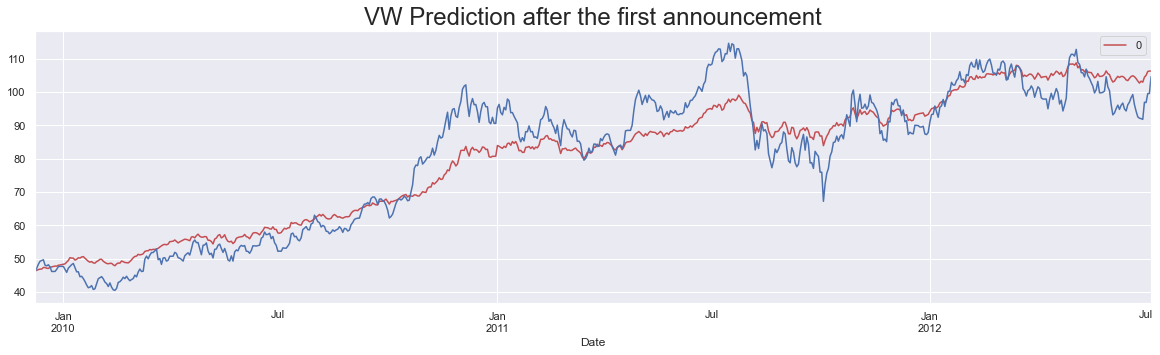

In [37]:
mod_auto_pre_vol = auto_arima(df.vol[start_date:ann1], exogenous=df[['por', 'bmw']][start_date:ann1],
                           m=5, max_p=5, max_q=5, max_P=5,max_Q=5, trend='ct')
df_auto_pred_pr = pd.DataFrame(mod_auto_pre_vol.predict(n_periods= len(df[ann1:ann2]),
                                                       exogenous=df[['por', 'bmw']][ann1:ann2]),
                              index = df[ann1:ann2].index)
df_auto_pred_pr[ann1:ann2].plot(figsize=(20,5), c='r')
df.vol[ann1:ann2].plot(c='b')
plt.title("VW Prediction after the first announcement", size=24)
plt.show()

# Volatility

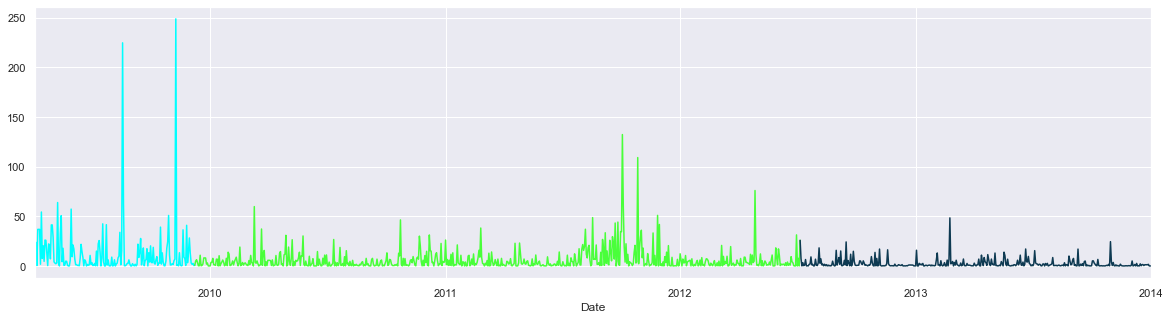

In [38]:
df.sq_vol[start_date:ann1].plot(figsize=(20,5), c='cyan')
df.sq_vol[ann1:ann2].plot(figsize=(20,5), c='#49FF3A')
df.sq_vol[ann2:end_date].plot(figsize=(20,5), c='#0E3A52')
plt.show()

In [47]:
# Volatility trend for each period
model_garch_pre = arch_model(df.ret_vol[start_date:ann1], vol = 'GARCH', p=1,q=1)
resuls_garch_pre = model_garch_pre.fit(update_freq=5)

model_garch_btw = arch_model(df.ret_vol[ann1:ann2], mean = 'constant', vol = 'GARCH', p=1,q=1)
resuls_garch_btw = model_garch_btw.fit(update_freq=5)

model_garch_post = arch_model(df.ret_vol[ann2:end_date], mean = 'constant', vol = 'GARCH', p=1,q=1)
resuls_garch_post = model_garch_post.fit(update_freq=5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 478.8794225988245
Iteration:     10,   Func. Count:     58,   Neg. LLF: 477.5321075081226
Optimization terminated successfully    (Exit mode 0)
            Current function value: 477.5321075072385
            Iterations: 12
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1520.0102705939717
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1519.9877026562085
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8
Iteration:      5,   Func. Count:     33,   Neg. LLF: 718.0816607776712
Iteration:     10,   Func. Count:     58,   Neg. LLF: 717.9164539627919
Optimization terminated successfully    (Exit mode 0)
            Current function value: 717.9164539625554
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


['mu']